In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import re
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
def load_dataset(path):
  """Loads the csv dataset based on the path"""
  read =  pd.read_csv(path)
  return read

dataset = load_dataset('./symptons.csv')

In [5]:
dataset.head()

,symptoms,disease
0,I can't stop sneezing and my nose is really ru...,NORMAL
1,"My nose is extremely runny, and I can't seem t...",NORMAL
2,I've been sneezing nonstop and I can't seem to...,NORMAL
3,I've been sneezing incessantly and I just can'...,NORMAL
4,I'm constantly sneezing and my body is shaking...,NORMAL


In [6]:
dataset.tail()

,symptoms,disease
195,"I frequently have indigestion and heartburn, e...",NORMAL
196,I regularly feel sick after eating and puke up...,NORMAL
197,"My throat often feels like it's on fire, espec...",NORMAL
198,Even when I don't have anything acidic in my s...,NORMAL
199,"I'm not in the mood to eat, and swallowing is ...",NORMAL


In [7]:
dataset_info = dataset.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   symptoms  200 non-null    object
 1   disease   200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB
None


In [8]:
def basic_eda(dataset):
  """Basic EDA on the dataset"""
  eda = {}
  eda['shape'] = dataset.shape
  eda['Dupilicates'] = int(dataset.duplicated().sum())
  eda['Missing Values\n'] = dataset.isnull().sum()
  eda['Dataset object types\n'] = dataset.dtypes

  for i in eda:
    print(i, eda[i])
    print("-"*20)

basic_eda(dataset)

shape (200, 2)
--------------------
Dupilicates 6
--------------------
Missing Values
 symptoms    0
disease     0
dtype: int64
--------------------
Dataset object types
 symptoms    object
disease     object
dtype: object
--------------------


disease
NORMAL       150
PNEUMONIA     50
Name: count, dtype: int64


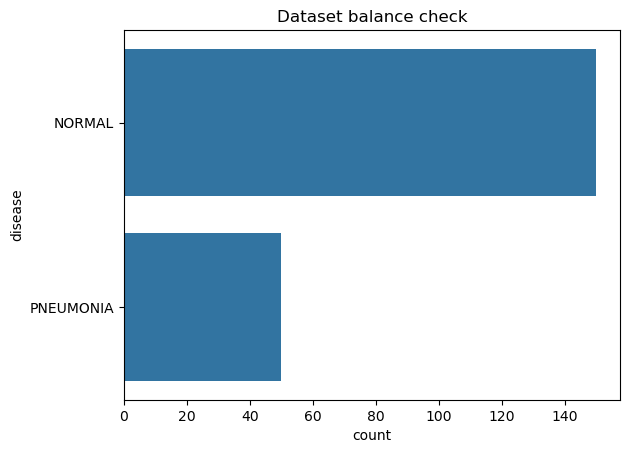

The dataset ratio is: 3.0
The dataset is sligthly imbalanced


In [9]:
def dataset_balance_check():
  """Checks the balance of the dataset"""
  count = dataset['disease'].value_counts()
  print(count)

  plt.title('Dataset balance check')
  sns.countplot(y = dataset['disease'])
  plt.show()

  ratio = count.max()/count.min()
  print(f'The dataset ratio is: {round(ratio,2)}')
  if ratio <= 1.5:
    print('The dataset is balanced')
  elif ratio <=3:
    print('The dataset is sligthly imbalanced')
  else:
    print('The dataset is extremely imbalanced')

dataset_balance_check()

In [10]:
def get_features_and_target():
  """Divides the datset into features (x) and target (y)"""
  x = dataset.drop(['disease'], axis=1)
  y = dataset['disease']
  return x, y

x, y = get_features_and_target()

In [11]:
x

,symptoms
0,I can't stop sneezing and my nose is really ru...
1,"My nose is extremely runny, and I can't seem t..."
2,I've been sneezing nonstop and I can't seem to...
3,I've been sneezing incessantly and I just can'...
4,I'm constantly sneezing and my body is shaking...
...,...
195,"I frequently have indigestion and heartburn, e..."
196,I regularly feel sick after eating and puke up...
197,"My throat often feels like it's on fire, espec..."
198,Even when I don't have anything acidic in my s...


In [12]:
y

0      NORMAL
1      NORMAL
2      NORMAL
3      NORMAL
4      NORMAL
        ...  
195    NORMAL
196    NORMAL
197    NORMAL
198    NORMAL
199    NORMAL
Name: disease, Length: 200, dtype: object

In [13]:
from imblearn.over_sampling import RandomOverSampler

def balance_dataset():
  """Balances the dataset"""
  ros = RandomOverSampler(random_state=42)
  balanced_dataset = ros.fit_resample(x, y)
  return balanced_dataset

x_bal, y_bal = balance_dataset()

In [14]:
counts = y_bal.value_counts()
counts

disease
NORMAL       150
PNEUMONIA    150
Name: count, dtype: int64

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srikh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopwords = stopwords.words('english')
print(stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [17]:
porter_stemmer = PorterStemmer()

In [18]:
def stemming(text):
  text_input = re.sub('[^a-zA-Z]', " ", text)
  text_input = text_input.lower()
  words = text_input.split()

  stem_input = []
  for word in words:
    if word not in stopwords:
      stem_input.append(porter_stemmer.stem(word))
  stem_input = " ".join(stem_input)
  return stem_input

In [19]:
x_bal['symptoms'] = x_bal['symptoms'].apply(stemming)

In [20]:
x_bal.head()

,symptoms
0,stop sneez nose realli runni also realli cold ...
1,nose extrem runni seem stop sneez addit consta...
2,sneez nonstop seem shake chill feel realli wea...
3,sneez incessantli get chill go away feel weak ...
4,constantli sneez bodi shake cold tire bare mov...


In [21]:
X = x_bal['symptoms'].values
Y = y_bal.values

In [22]:
X

array(['stop sneez nose realli runni also realli cold tire time cough lot fever realli high like way normal',
       'nose extrem runni seem stop sneez addit constantli feel cold exhaust cough lot fever also realli high far normal',
       'sneez nonstop seem shake chill feel realli weak tire cough go away fever realli high',
       'sneez incessantli get chill go away feel weak exhaust cough stop temperatur realli high',
       'constantli sneez bodi shake cold tire bare move head kill fever roof',
       'constantli sneez cold make bodi trembl exhaust hardli move head hurt fever quit high',
       'quit exhaust ill sneez nonstop quit cold head throb lack energi addit high fever feel like fire',
       'feel realli tire sick sneez lot seem get warm tire head kill fever realli high like boil',
       'quit exhaust ill throat quit pain fairli nasti cough got lot chill pretti high temperatur feel extrem run weak',
       'quit exhaust ill sneez lot troubl warm exhaust head hurt feel like

In [23]:
Y

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEU

In [24]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logestic Regression': LogisticRegression(C=0.1, max_iter=1000,random_state=42,class_weight="balanced"),
    'Support Vector Machine': SVC(C=0.1, kernel='rbf', random_state=42, class_weight="balanced"),
    'Random Forest': RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=42)
}

In [27]:
def train_models(model_classifier, xt, yt):
  """Trains multiple models at same time"""
  trained_models = {}
  for name, model_instance in model_classifier.items():
    print(f"training {name}")
    model_instance.fit(xt, yt)
    trained_models[name] = model_instance
    print(f"{name} trained!")
    print('-'*50)
  return trained_models

trained_models = train_models(models, X_train, Y_train)

training Logestic Regression
Logestic Regression trained!
--------------------------------------------------
training Support Vector Machine
Support Vector Machine trained!
--------------------------------------------------
training Random Forest
Random Forest trained!
--------------------------------------------------
training Decision Tree
Decision Tree trained!
--------------------------------------------------


In [28]:
def test_models(model_classifier, xt):
  """Tests the multiple trained models"""
  test_models = {}
  for name, model_instance in model_classifier.items():
    print(f"testing {name}.")
    test_models[name] = model_instance.predict(xt)
    print(f'predicted {name}!')
    print('-'*50)
  return test_models

predicted_models = test_models(trained_models, X_test)

testing Logestic Regression.
predicted Logestic Regression!
--------------------------------------------------
testing Support Vector Machine.
predicted Support Vector Machine!
--------------------------------------------------
testing Random Forest.
predicted Random Forest!
--------------------------------------------------
testing Decision Tree.
predicted Decision Tree!
--------------------------------------------------


In [29]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def training_results(trained_models, X_train, y_train):
    """
    Computes training results for multiple trained models.
    """
    results = {}

    for model_name, model in trained_models.items():
        y_train_pred = model.predict(X_train)

        results[model_name] = {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'recall': recall_score(y_train, y_train_pred, average='weighted'),
            'f1': f1_score(y_train, y_train_pred, average='weighted'),
            'precision': precision_score(y_train, y_train_pred, average='weighted')
        }

    for i in results:
      print(i, results[i])
      print("-"*20)


train_metrics = training_results(trained_models, X_train, Y_train)
train_metrics

Logestic Regression {'accuracy': 0.9958333333333333, 'recall': 0.9958333333333333, 'f1': 0.9958338401302034, 'precision': 0.9958689458689458}
--------------------
Support Vector Machine {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------
Random Forest {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------
Decision Tree {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------


In [30]:
def test_results(predicted_models, y_test):
  """Computes test results for multiple trained models from their predictions"""
  results = {}
  for model_name, y_pred in predicted_models.items():
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted')
        }

  for i in results:
    print(i, results[i])
    print("-"*20)

test_metrics = test_results(predicted_models, Y_test)
test_metrics

Logestic Regression {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------
Support Vector Machine {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------
Random Forest {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------
Decision Tree {'accuracy': 1.0, 'recall': 1.0, 'f1': 1.0, 'precision': 1.0}
--------------------


In [31]:
def over_fitting_check():
  """Checks overfitting of trained multiple models"""
  for model_name, model in trained_models.items():
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    print(f"{model_name} train score: {train_score}")
    print(f"{model_name} test score: {test_score}")
    gap = abs(train_score - test_score)
    print(f"{model_name} gap: {gap}")
    if train_score < 0.6 and test_score < 0.6:
        print("model: Underfitting")
    elif gap <= 0.07:
        print("model: Good fit!")
    elif gap <= 0.15:
        print("model: moderate overfitting")
    else:
        print("model: Extreme Overfitting")
    print('-'*50)

over_fitting_check()

Logestic Regression train score: 0.9958333333333333
Logestic Regression test score: 1.0
Logestic Regression gap: 0.004166666666666652
model: Good fit!
--------------------------------------------------
Support Vector Machine train score: 1.0
Support Vector Machine test score: 1.0
Support Vector Machine gap: 0.0
model: Good fit!
--------------------------------------------------
Random Forest train score: 1.0
Random Forest test score: 1.0
Random Forest gap: 0.0
model: Good fit!
--------------------------------------------------
Decision Tree train score: 1.0
Decision Tree test score: 1.0
Decision Tree gap: 0.0
model: Good fit!
--------------------------------------------------


In [32]:
log_model = models['Logestic Regression']
log_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [33]:
y_pred = log_model.predict(X_test)

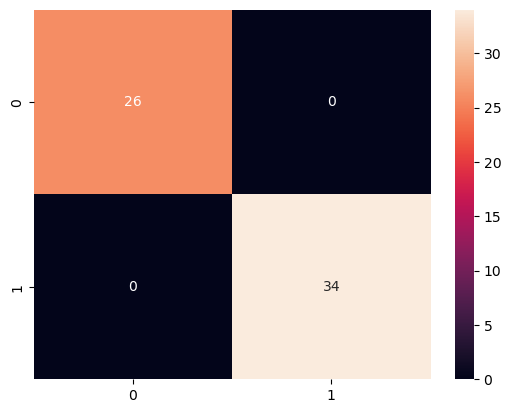

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      NORMAL       1.00      1.00      1.00        26
   PNEUMONIA       1.00      1.00      1.00        34

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=log_model, X=X_train, y=Y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9916666666666668
0.016666666666666653


In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)*100
print(f'Accuracy of model is: {accuracy}')

Accuracy of model is: 100.0


In [38]:
import joblib

joblib.dump(log_model, "symptom_model.pkl")
joblib.dump(vectorizer, "tfidf.pkl")

['tfidf.pkl']